<a href="https://colab.research.google.com/github/Foram003/Machine-Learning/blob/main/Decisiontree_regressor_carprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/carprediction.csv")
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
data.duplicated().sum()

715

In [ ]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df['Engine HP']=df['Engine HP'].fillna(data['Engine HP'].mean())
df['Engine Cylinders']=df['Engine Cylinders'].fillna(data['Engine Cylinders'].mean())

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df1=pd.DataFrame(df)
df1=df1.dropna()
df1.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7817 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               7817 non-null   object 
 1   Model              7817 non-null   object 
 2   Year               7817 non-null   int64  
 3   Engine Fuel Type   7817 non-null   object 
 4   Engine HP          7817 non-null   float64
 5   Engine Cylinders   7817 non-null   float64
 6   Transmission Type  7817 non-null   object 
 7   Driven_Wheels      7817 non-null   object 
 8   Number of Doors    7817 non-null   float64
 9   Market Category    7817 non-null   object 
 10  Vehicle Size       7817 non-null   object 
 11  Vehicle Style      7817 non-null   object 
 12  highway MPG        7817 non-null   int64  
 13  city mpg           7817 non-null   int64  
 14  Popularity         7817 non-null   int64  
 15  MSRP               7817 non-null   int64  
dtypes: float64(3), int64(5)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df1['Make']= label_encoder.fit_transform(df1['Make'])
df1['Model']= label_encoder.fit_transform(df1['Model'])
df1['Engine Fuel Type']= label_encoder.fit_transform(df1['Engine Fuel Type'])
df1['Transmission Type']= label_encoder.fit_transform(df1['Transmission Type'])
df1['Driven_Wheels']= label_encoder.fit_transform(df1['Driven_Wheels'])
df1['Market Category']= label_encoder.fit_transform(df1['Market Category'])
df1['Vehicle Size']= label_encoder.fit_transform(df1['Vehicle Size'])
df1['Vehicle Style']= label_encoder.fit_transform(df1['Vehicle Style'])

In [ ]:
df1.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,7,335.0,6.0,3,3,2.0,38,0,8,26,19,3916,46135
1,4,0,2011,7,300.0,6.0,3,3,2.0,67,0,6,28,19,3916,40650
2,4,0,2011,7,300.0,6.0,3,3,2.0,64,0,8,28,20,3916,36350
3,4,0,2011,7,230.0,6.0,3,3,2.0,67,0,8,28,18,3916,29450
4,4,0,2011,7,230.0,6.0,3,3,2.0,63,0,6,28,18,3916,34500


In [ ]:
X=df1.drop(["MSRP"],axis=1)
Y=df1["MSRP"]

In [ ]:
X.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,4,1,2011,7,335.0,6.0,3,3,2.0,38,0,8,26,19,3916
1,4,0,2011,7,300.0,6.0,3,3,2.0,67,0,6,28,19,3916
2,4,0,2011,7,300.0,6.0,3,3,2.0,64,0,8,28,20,3916
3,4,0,2011,7,230.0,6.0,3,3,2.0,67,0,8,28,18,3916
4,4,0,2011,7,230.0,6.0,3,3,2.0,63,0,6,28,18,3916


In [ ]:
Y.head()

0    46135
1    40650
2    36350
3    29450
4    34500
Name: MSRP, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg=DecisionTreeRegressor(random_state=1)

In [ ]:
reg.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
y_train_pred=reg.predict(X_train)
y_train_pred

array([ 16849.        , 198700.        ,  31586.        , ...,
        21207.5       ,  38070.        ,  26434.16666667])

In [ ]:
y_test_pred=reg.predict(X_test)
y_test_pred

array([26395., 47070., 41350., ..., 50485., 94400., 56300.])

In [ ]:
train = reg.score(X_train,Y_train)
train

0.9934775261180736

In [ ]:
test = reg.score(X_test,Y_test)
test

0.9555587658676301

In [ ]:
abs((train - test))

0.037918760250443495

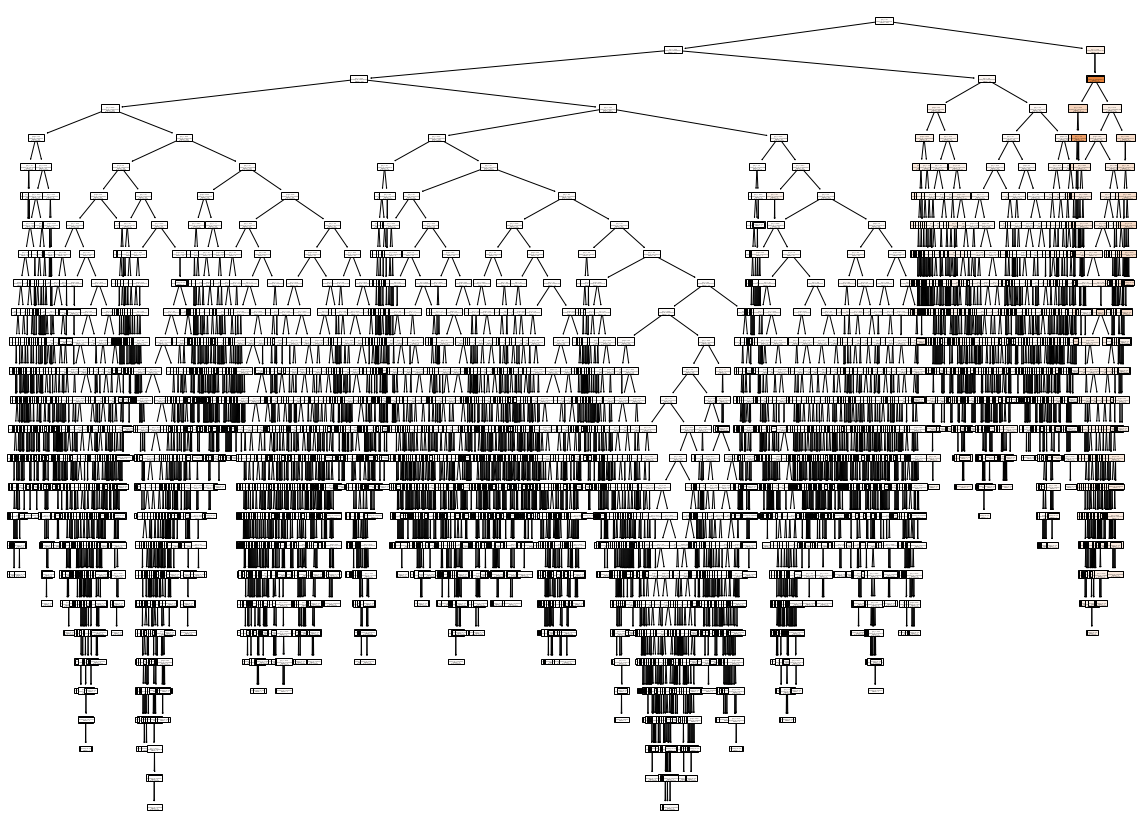

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(reg,filled=True)
plt.show()
